# EDA - Dataset de Videojuegos

Este notebook realiza un flujo básico de EDA: carga, exploración, limpieza y visualizaciones.

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Cargar dataset
df = pd.read_csv("data/Latest_2025_movies_Datasets.csv")

In [3]:
# Ver primeras filas
df.head()

,Unnamed: 0,title,release_date,original_language,popularity,vote_count,vote_average,overview
0,0,Our Fault,2025-10-15,es,1096.6654,302,7.869,Jenna and Lion's wedding brings about the long...
1,1,Inside Furioza,2025-10-14,pl,384.3220,27,6.593,"In the wake of murder, new Furioza leader Gold..."
2,2,Captain Hook - The Cursed Tides,2025-07-11,en,370.1091,15,5.000,In the aftermath of a devastating defeat by hi...
3,3,War of the Worlds,2025-07-29,en,327.8760,642,4.400,Will Radford is a top analyst for Homeland Sec...
4,4,The Conjuring: Last Rites,2025-09-03,en,284.0186,1065,6.972,Paranormal investigators Ed and Lorraine Warre...


In [4]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   title              10000 non-null  object 
 2   release_date       9951 non-null   object 
 3   original_language  10000 non-null  object 
 4   popularity         10000 non-null  float64
 5   vote_count         10000 non-null  int64  
 6   vote_average       10000 non-null  float64
 7   overview           9758 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 625.1+ KB


In [5]:
# Estadísticas numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10000.0,4999.500000,2886.895680,0.0000,2499.750000,4999.50000,7499.250000,9999.0000
popularity,10000.0,7.085813,16.379058,2.6167,4.499975,4.97535,6.172225,1096.6654
vote_count,10000.0,1470.490600,3405.494983,0.0000,4.000000,71.00000,1173.250000,38078.0000
vote_average,10000.0,5.538950,2.417306,0.0000,5.113750,6.30000,7.011000,10.0000


In [6]:
# Nulls
nulos = df.isnull().sum().to_frame("nulos")
nulos["porcentaje"] = (nulos["nulos"] / len(df) * 100).round(2)
nulos.sort_values("nulos", ascending=False)

# Duplicados
df.duplicated().sum()


np.int64(0)

## Limpieza y normalización
- Asegurar tipos correctos.
- Tratar valores nulos si existen.
- Normalizar formatos (ej. nombres de plataformas).

In [7]:
# 1) Eliminacion de duplicados

df = df.drop_duplicates()

# 2) Conversión de tipos (dependiendo del contenido que haya en cada columna)

# Convertimos posibles columnas numéricas guardadas como texto
for col in df.columns:
    if df[col].dtype == "object":
        # Intentamos convertir a número, si falla se queda como texto
        conv = pd.to_numeric(df[col], errors='coerce')
        # Si muchos valores pudieron convertirse, lo dejamos como numérico
        if conv.notnull().sum() > 0:
            df[col] = conv

# Convertimos posibles columnas de fecha
for col in df.columns:
    if "date" in col.lower() or "release" in col.lower():
        # Justificación: convertir a datetime permite análisis temporales
        df[col] = pd.to_datetime(df[col], errors='coerce')

# 3) Tratamiento de nulos

# Para columnas numéricas: imputamos mediana si faltan menos del 5%
for col in df.select_dtypes(include="number").columns:
    pct = df[col].isnull().mean()
    if 0 < pct < 0.05:
        df[col] = df[col].fillna(df[col].median())

# Para columnas categóricas: rellenamos con "Unknown" si faltan pocos valores
for col in df.select_dtypes(include="object").columns:
    pct = df[col].isnull().mean()
    if 0 < pct < 0.05:
        df[col] = df[col].fillna("Unknown")

# 4) Normalización de categorías

for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip().str.title()

# 5) Conversión final de categorías

for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype("category")

# Vista previa final
df.head()

,Unnamed: 0,title,release_date,original_language,popularity,vote_count,vote_average,overview
0,0,NaN,2025-10-15,Es,1096.6654,302,7.869,Jenna And Lion'S Wedding Brings About The Long...
1,1,NaN,2025-10-14,Pl,384.3220,27,6.593,"In The Wake Of Murder, New Furioza Leader Gold..."
2,2,NaN,2025-07-11,En,370.1091,15,5.000,In The Aftermath Of A Devastating Defeat By Hi...
3,3,NaN,2025-07-29,En,327.8760,642,4.400,Will Radford Is A Top Analyst For Homeland Sec...
4,4,NaN,2025-09-03,En,284.0186,1065,6.972,Paranormal Investigators Ed And Lorraine Warre...


## Visualizaciones

1) Histograma de `Sales_Global` (ventas globales estimadas en millones)

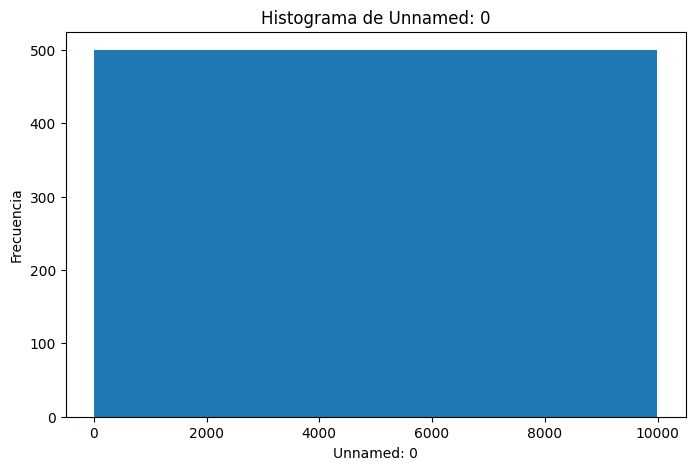

In [8]:
# Seleccionar la primera columna numérica del dataset
num_cols = df.select_dtypes(include='number').columns
col = num_cols[0]   # primera columna numérica

plt.figure(figsize=(8,5))
plt.hist(df[col].dropna(), bins=20)  # Histograma con 20 intervalos
plt.title(f"Histograma de {col}")
plt.xlabel(col)
plt.ylabel("Frecuencia")
plt.show()

2) Gráfica de barras: publishers con más ventas totales

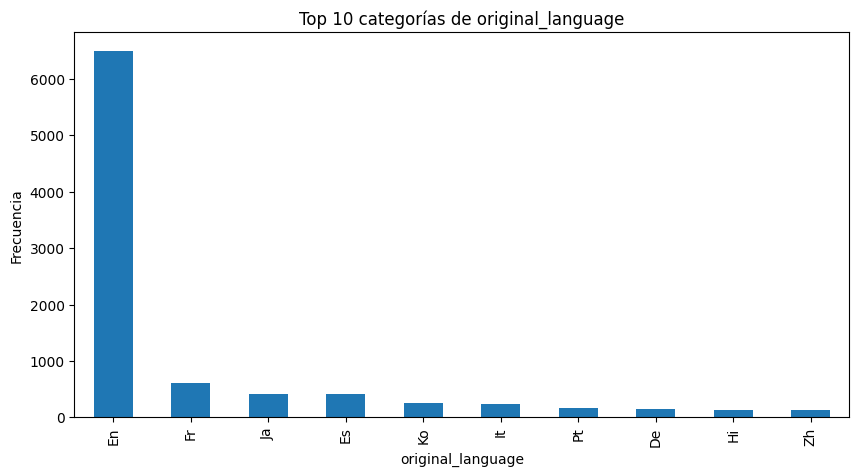

In [9]:
# Seleccionar la columna categórica con más valores no nulos
cat_cols = df.select_dtypes(include=['object', 'category']).columns
bar_col = max(cat_cols, key=lambda c: df[c].notnull().sum())

top10 = df[bar_col].value_counts().nlargest(10)

plt.figure(figsize=(10,5))
top10.plot(kind='bar')
plt.title(f"Top 10 categorías de {bar_col}")
plt.xlabel(bar_col)
plt.ylabel("Frecuencia")
plt.show()

3) Boxplot: Distribución de `Rating` por `Genre`

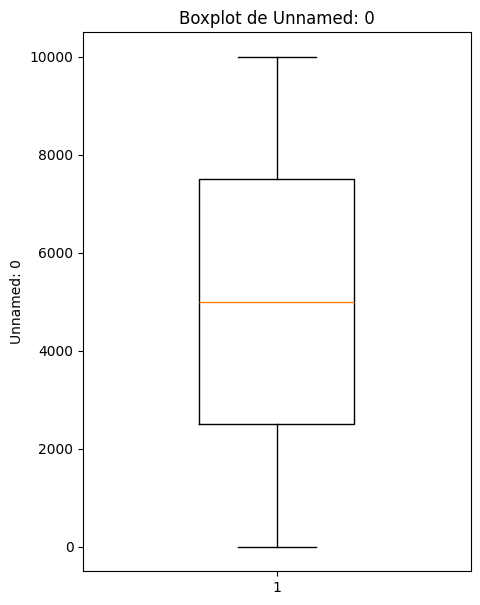

In [10]:
plt.figure(figsize=(5,7))
plt.boxplot(df[col].dropna(), vert=True, widths=0.4)
plt.title(f"Boxplot de {col}")
plt.ylabel(col)
plt.show()

4) Línea temporal: ventas por año (si aplica)

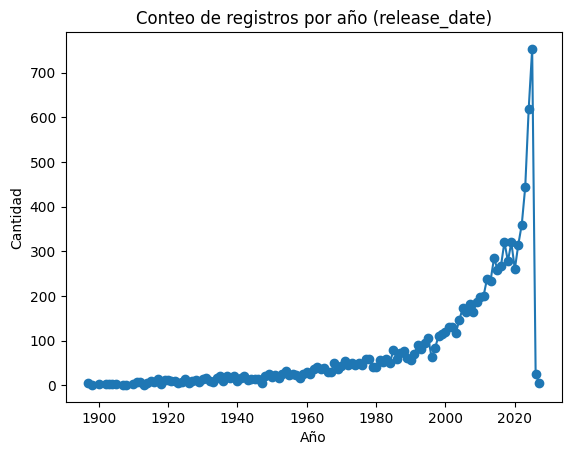

In [11]:
# Detectar una columna de fecha ya parseada
fecha_cols = [c for c in df.columns if df[c].dtype == 'datetime64[ns]']

if fecha_cols:
    f = fecha_cols[0]
    df['year'] = df[f].dt.year

    df['year'].value_counts().sort_index().plot(kind='line', marker='o')
    plt.title(f"Conteo de registros por año ({f})")
    plt.xlabel("Año")
    plt.ylabel("Cantidad")
    plt.show()


## Conclusiones exploratorias

- Resumen de las principales características detectadas en el dataset.
- Principales hallazgos y limpieza aplicada.

(Completa con tus observaciones personales al entregar el ejercicio.)